### Planning a telescope observation


Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$


- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

Here is an illustration of this process from an article in [towarddatascience.com](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d).

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


#### Tasks

- In the above example, experiment with chopping off different numbers of initial points as burn-in.


#### More

- Redo the same for the Markovian process describing the stock market (see above in this notebook). If you've written your code well, this should require minor modifications.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity
import random



In [59]:
sunny = 1
cloudy = 0
N = 10**4


$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$


$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$


$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$


$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$



In [60]:
def weather_forecast (weather):
    if (weather == sunny):
        p_cloudy = 0.1
        p_sunny = 0.9
    else :
        p_cloudy = 0.5
        p_sunny = 0.5
    return p_sunny


'\ndef probability (weather):\n    prob = random.uniform(0, 1, 1)\n    \n    if (prob < weather_forecast(weather)):\n        chain.append\n'

In [92]:
weather_current = cloudy
posterior = [weather_current]
fraction_sunny = []
for i in range(N):
    weather_proposal = np.random.choice([0,1])
    

    prob_current = weather_forecast(weather_current)
    prob_proposal = weather_forecast(weather_proposal)
    
    
    p_accept = prob_proposal / prob_current
        

    accept = np.random.rand() < p_accept
    if accept:
        weather_current = weather_proposal


    posterior.append(weather_current) 

    fraction_sunny.append(np.sum(posterior) / len(posterior))


        

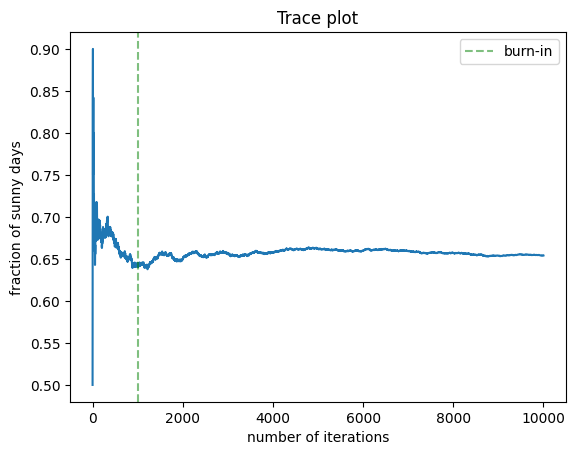

In [93]:
x_grid = np.linspace(0, N, N)
plt.plot(x_grid, fraction_sunny )
plt.xlabel('number of iterations')
plt.ylabel('fraction of sunny days')
plt.title('Trace plot')
burn_in = 1000
plt.axvline(burn_in, color = 'green', linestyle = '--', label = 'burn-in', alpha = 0.5)
plt.legend()

In [94]:
print("min and max:", min(fraction_sunny),max(fraction_sunny))
print("median:", np.median(fraction_sunny))
print("sigmaG:", astroMLstats.sigmaG(fraction_sunny))


min and max: 0.5 0.9
median: 0.657080843961009
sigmaG: 0.004131165964659362


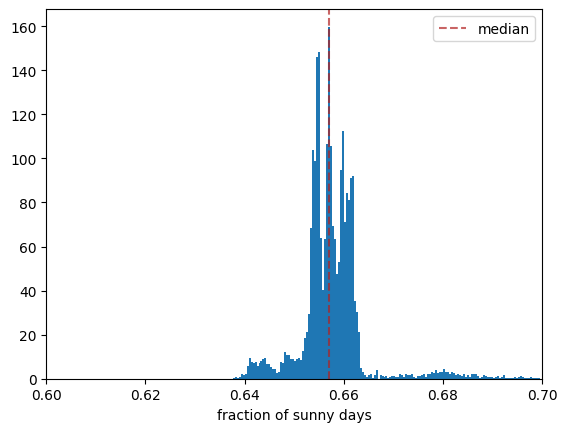

In [95]:
plt.hist(fraction_sunny, bins = int( N/10), density = True);
plt.xlim(0.6, 0.7)
plt.xlabel('fraction of sunny days')
median = np.median(fraction_sunny)
plt.axvline(median, color = 'firebrick',alpha= 0.7, label = 'median', linestyle = '--')
plt.legend()

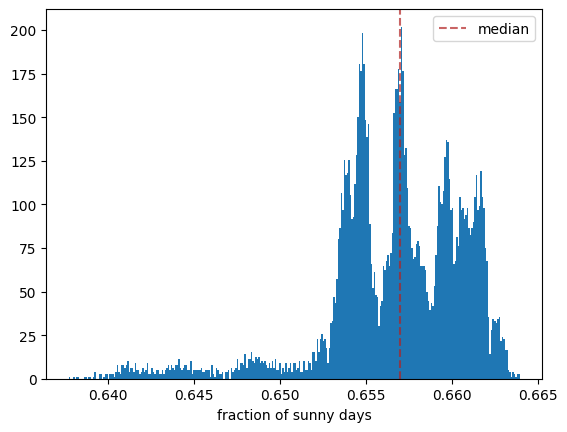

In [96]:
plt.hist(fraction_sunny[burn_in:], bins = 300, density = True);
#plt.xlim(0.6, 0.7)
plt.xlabel('fraction of sunny days')
median = np.median(fraction_sunny[burn_in:])
plt.axvline(median, color = 'firebrick',alpha= 0.7, label = 'median', linestyle = '--')
plt.legend()

In [97]:
print("WITH BURN IN: \nmin and max:", min(fraction_sunny[burn_in:]),max(fraction_sunny[burn_in:]))
print("median:", np.median(fraction_sunny[burn_in:]))
print("sigmaG:", astroMLstats.sigmaG(fraction_sunny[burn_in:]))


WITH BURN IN: 
min and max: 0.6377049180327868 0.6639549436795995
median: 0.6570089141461455
sigmaG: 0.003832942701961323


## same code but wuth the STOCK MARKET


The stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would a a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)


In [99]:
bull = 2
bear = 1
stagnant = 0
N = 10**4

In [100]:
def market_forecast (market):
    if (market == bull):
        p_bear = 0.075
        p_bull = 0.9
        p_stagnant = 0.025
    elif (market == bear):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
    else :
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5  
    return p_bull



In [107]:
market_current = cloudy
posterior = [market_current]
fraction_bull = []
n_bulls = 0
for i in range(N):
    market_proposal = np.random.choice([0,1, 2])
    

    prob_current = market_forecast(market_current)
    prob_proposal = market_forecast(market_proposal)
    
    
    p_accept = prob_proposal / prob_current
        

    accept = np.random.rand() < p_accept
    if accept:
        market_current = market_proposal


    posterior.append(market_current)

    if (market_current == bull):
        n_bulls = n_bulls + 1 

    fraction_bull.append(n_bulls / len(posterior))

        

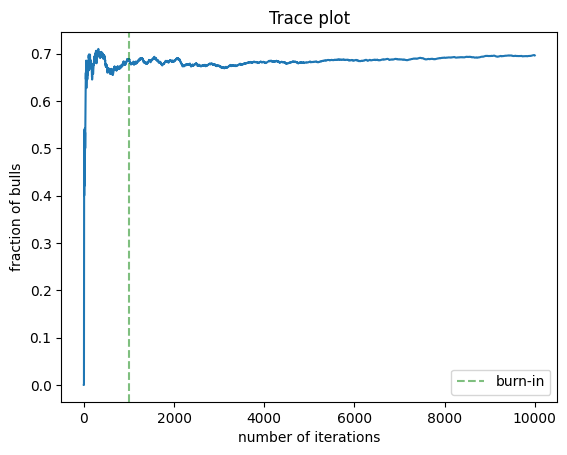

In [108]:
x_grid = np.linspace(0, N, N)
plt.plot(x_grid, fraction_bull )
plt.xlabel('number of iterations')
plt.ylabel('fraction of bulls')
plt.title('Trace plot')
burn_in = 1000
plt.axvline(burn_in, color = 'green', linestyle = '--', label = 'burn-in', alpha = 0.5)
plt.legend()

In [ ]:
print("min and max:", min(fraction_bull),max(fraction_bull))
print("median:", np.median(fraction_bull))
print("sigmaG:", astroMLstats.sigmaG(fraction_bull))


min and max: 0.0 0.6714285714285714
median: 0.6271813123770842
sigmaG: 0.0034472161152977808


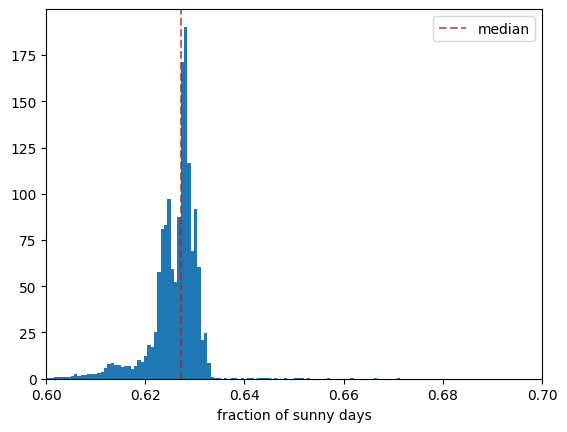

In [ ]:
plt.hist(fraction_bull, bins = int( N/10), density = True);
plt.xlim(0.6, 0.7)
plt.xlabel('fraction of bull')
median = np.median(fraction_bull)
plt.axvline(median, color = 'firebrick',alpha= 0.7, label = 'median', linestyle = '--')
plt.legend()

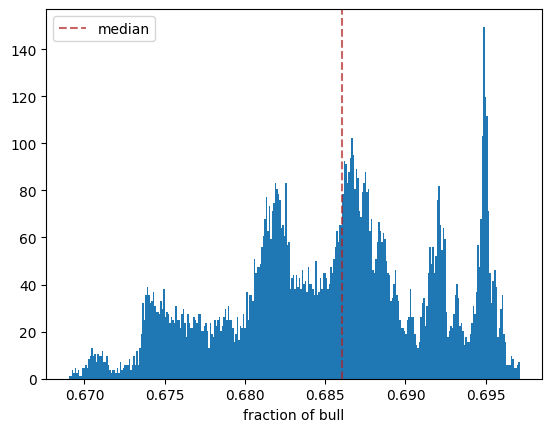

In [110]:
plt.hist(fraction_bull[burn_in:], bins = 300, density = True);
#plt.xlim(0.6, 0.7)
plt.xlabel('fraction of bull')
median = np.median(fraction_bull[burn_in:])
plt.axvline(median, color = 'firebrick',alpha= 0.7, label = 'median', linestyle = '--')
plt.legend()

In [112]:
print("WITH BURN IN: \nmin and max:", min(fraction_bull[burn_in:]),max(fraction_bull[burn_in:]))
print("median:", np.median(fraction_bull[burn_in:]))
print("sigmaG:", astroMLstats.sigmaG(fraction_bull[burn_in:]))


WITH BURN IN: 
min and max: 0.6690186016677357 0.6971062381095424
median: 0.686052917831516
sigmaG: 0.006578810864448103
